# Step 1: Import Libraries

In [116]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Download Images

In [117]:
!wget https://raw.githubusercontent.com/AsadiAhmad/Human-Skin-Detection/main/Pictures/Input/jensen_huang.jpg -O jensen_huang.jpg
!wget https://raw.githubusercontent.com/AsadiAhmad/Human-Skin-Detection/main/Pictures/Input/elon_musk.jpg -O elon_musk.jpg
!wget https://raw.githubusercontent.com/AsadiAhmad/Human-Skin-Detection/main/Pictures/Input/mark_zukerberg.jpg -O mark_zukerberg.jpg
!wget https://raw.githubusercontent.com/AsadiAhmad/Human-Skin-Detection/main/Pictures/Input/linus_torvalds.jpg -O linus_torvalds.jpg

--2025-04-28 20:16:35--  https://raw.githubusercontent.com/AsadiAhmad/Human-Skin-Detection/main/Pictures/Input/jensen_huang.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 284161 (278K) [image/jpeg]
Saving to: ‘jensen_huang.jpg’

jensen_huang.jpg    100%[===================>] 277.50K  --.-KB/s    in 0.04s   

2025-04-28 20:16:35 (6.41 MB/s) - ‘jensen_huang.jpg’ saved [284161/284161]

--2025-04-28 20:16:35--  https://raw.githubusercontent.com/AsadiAhmad/Human-Skin-Detection/main/Pictures/Input/elon_musk.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting

# Step 3: Load Image

In [118]:
bgr_image = cv2.imread('jensen_huang.jpg')

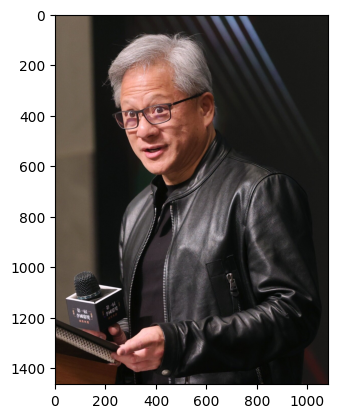

In [119]:
rgb_image = bgr_image[...,::-1]
plt.imshow(rgb_image)

# Step 4: Extract HSV and YCrCb color formats

In [120]:
hsv_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2HSV)
ycrcb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2YCrCb)

# Step 5: Split Image Channels

In [121]:
B, G, R = cv2.split(bgr_image)
H, S, V = cv2.split(hsv_image)
Y, Cr, Cb = cv2.split(ycrcb_image)

# Step 6: Apply Conditions

In [122]:
def conditions(r, g, b, h, s, v, y, cr, cb):
    s = s / 255.0
    condition_rgb = (r > 95) and (g > 40) and (b > 20) and (r > g) and (r > b) and (abs(r-g) > 15)
    condition_hsv = (0 <= h <= 50) and (0.23 <= s <= 0.68)
    condition_ycrcb = (cr > 135) and (cb > 85) and (y > 80) and (cr <= (1.5862*cb)+20) and (cr>=(0.3448*cb)+76.2069) and (cr >= (-4.5652*cb)+234.5652) and (cr <= (-1.15*cb)+301.75) and (cr <= (-2.2857*cb)+432.85)
    return condition_rgb and condition_hsv and condition_ycrcb

In [123]:
height, width, channels = bgr_image.shape
image = np.zeros((height, width), np.uint8)
main_image = bgr_image.copy()
for i in range(height):
    for j in range(width):
        if conditions(R[i, j], G[i, j], B[i, j], H[i, j], S[i, j], V[i, j], Y[i, j], Cr[i, j], Cb[i, j]):
            image[i, j] = 255
        else:
            main_image[i, j] = [0, 0, 0]

# Step 7: Plot images

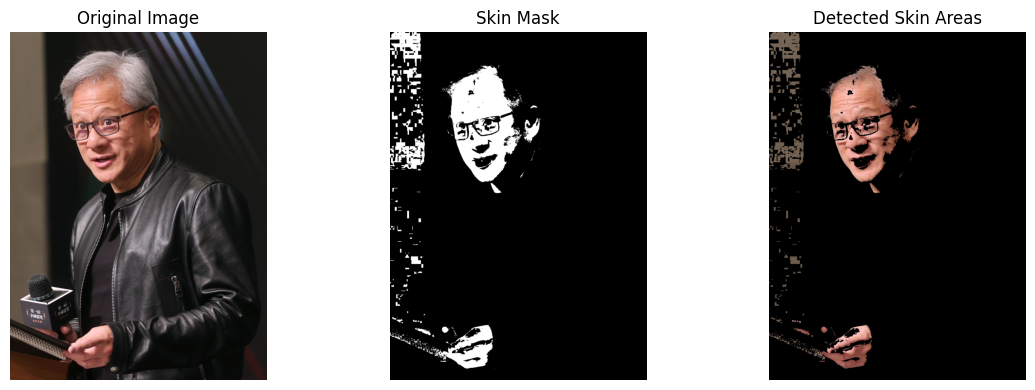

In [124]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].imshow(cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(image, cmap='gray')
axs[1].set_title('Skin Mask')
axs[1].axis('off')

axs[2].imshow(cv2.cvtColor(main_image, cv2.COLOR_BGR2RGB))
axs[2].set_title('Detected Skin Areas')
axs[2].axis('off')

plt.tight_layout()
plt.show()

# Step 8: Put all together

In [125]:
def skin_detector(bgr_image):
    hsv_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2HSV)
    ycrcb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2YCrCb)
    B, G, R = cv2.split(bgr_image)
    H, S, V = cv2.split(hsv_image)
    Y, Cr, Cb = cv2.split(ycrcb_image)
    height, width, channels = bgr_image.shape
    image = np.zeros((height, width), np.uint8)
    main_image = bgr_image.copy()
    for i in range(height):
        for j in range(width):
            if conditions(R[i, j], G[i, j], B[i, j], H[i, j], S[i, j], V[i, j], Y[i, j], Cr[i, j], Cb[i, j]):
                image[i, j] = 255
            else:
                main_image[i, j] = [0, 0, 0]

    fig, axs = plt.subplots(1, 3, figsize=(12, 4))

    axs[0].imshow(cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB))
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    axs[1].imshow(image, cmap='gray')
    axs[1].set_title('Skin Mask')
    axs[1].axis('off')

    axs[2].imshow(cv2.cvtColor(main_image, cv2.COLOR_BGR2RGB))
    axs[2].set_title('Detected Skin Areas')
    axs[2].axis('off')

    plt.tight_layout()
    plt.show()

In [126]:
elon_musk = cv2.imread('elon_musk.jpg')
mark_zukerberg = cv2.imread('mark_zukerberg.jpg')
linus_torvalds = cv2.imread('linus_torvalds.jpg')

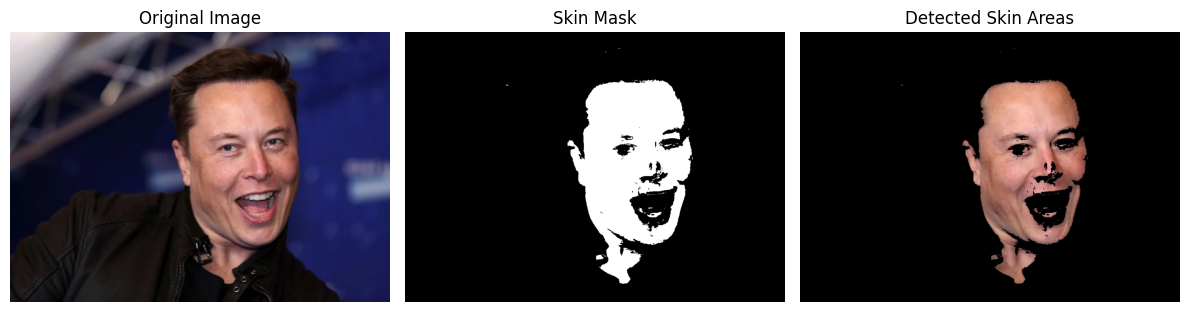

In [127]:
skin_detector(elon_musk)

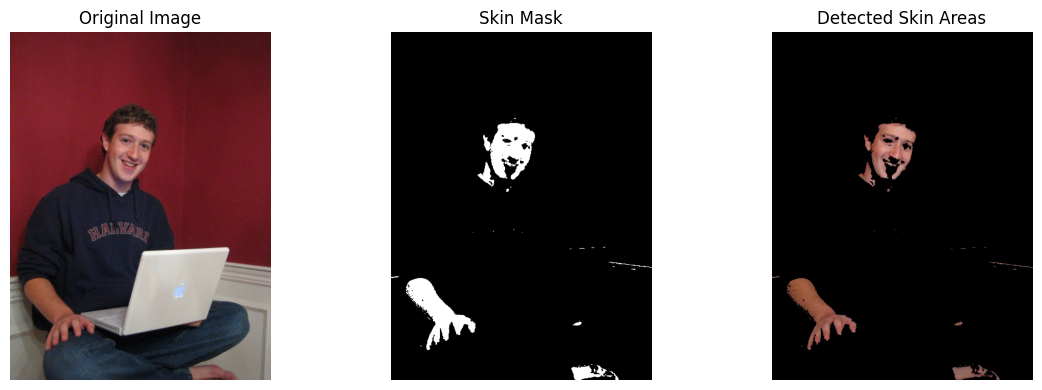

In [128]:
skin_detector(mark_zukerberg)

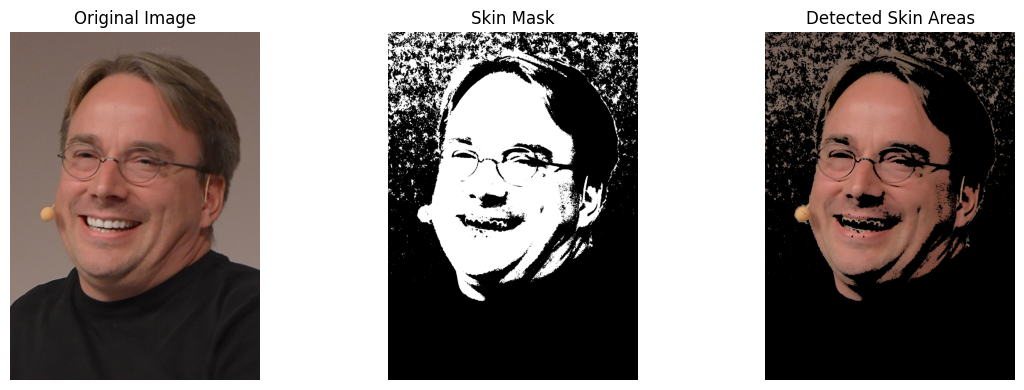

In [129]:
skin_detector(linus_torvalds)